In [58]:
import numpy as np
import matplotlib.pyplot as plt
from empca import empca,classic_pca
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [59]:
seed = np.random.seed(1)
def makemydata(N,D,sigma=0.1):
    """
    Make a data set drawn from a Gaussian of arbitrary dimension with an arbitrary number of data points, 
    then add Gaussian noise to each point.
    """
    olddata = np.zeros((N,D))
    for d in range(D):
        center = 2*np.random.random()
        olddata[:,d] = np.random.normal(loc=center,size=N)
    noise = sigma*np.random.randn(N,D)
    data = noise + olddata
    return data,noise,sigma


In [60]:
def cross_streams(vals,value,gt=True):
    if gt:
        if np.where(vals>value)[0].size > 0:
            return np.where(vals>value)[0][0]-1
        else: 
            return None
    elif not gt:
        if np.where(vals<value)[0].size > 0:
            return np.where(vals<value)[0][0]-1
        else: 
            return None

# Classical PCA #

## 10 eigenvectors ##

1.0 1.35272070307 0.260749097923


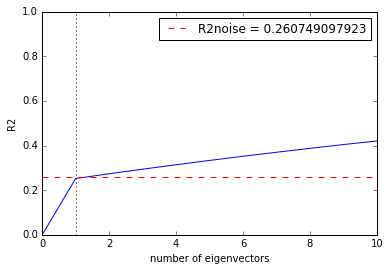

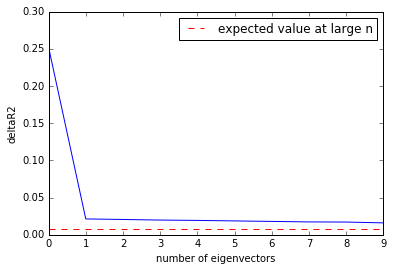

In [45]:
N = 100
D = 200
data, noise,Sd = makemydata(N,D)
e = classic_pca(data,nvec=10)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 50 eigenvectors ##

1.0 1.27944668567 0.218412137681


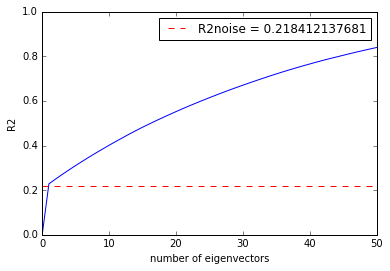

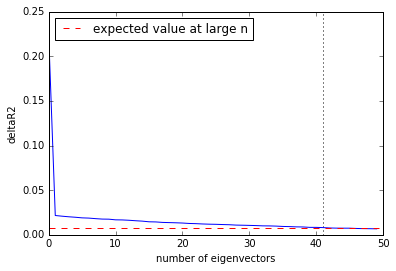

In [47]:
N = 100
D = 200
data, noise,Sd = makemydata(N,D)
e = classic_pca(data,nvec=50)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 100 eigenvectors ##

1.0 1.3468436962 0.257523346755


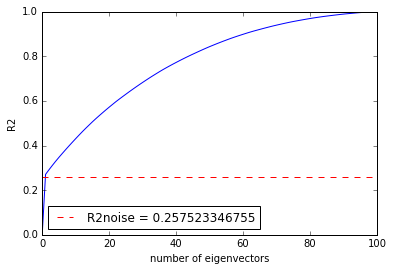

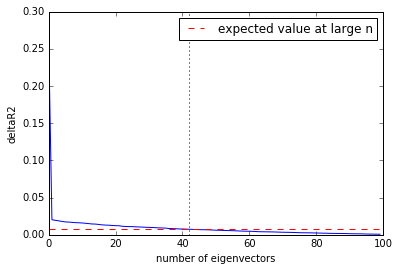

In [48]:
N = 100
D = 200
data, noise,Sd = makemydata(N,D)
e = classic_pca(data,nvec=100)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 150 eigenvectors ##

1.0 1.32877676335 0.247428140239


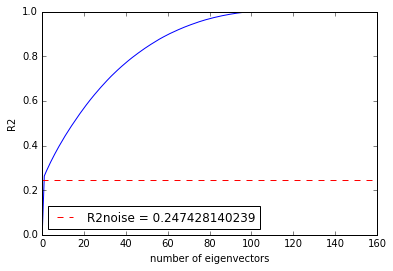

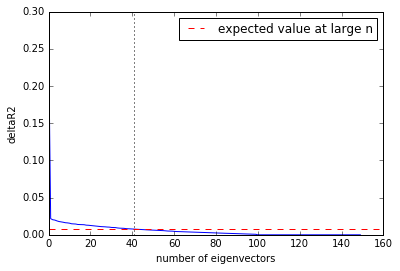

In [49]:
N = 100
D = 200
data, noise, Sd = makemydata(N,D)
e = classic_pca(data,nvec=150)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

# Signal Test #

       iter        R2             rchi2
EMPCA  1/10       1.00000000     -0.00000000
EMPCA  2/10       1.00000000     -0.00000000
EMPCA  3/10       1.00000000     -0.00000000
EMPCA  4/10       1.00000000     -0.00000000
EMPCA  5/10       1.00000000     -0.00000000
EMPCA  6/10       1.00000000     -0.00000000
EMPCA  7/10       1.00000000     -0.00000000
EMPCA  8/10       1.00000000     -0.00000000
EMPCA  9/10       1.00000000     -0.00000000
EMPCA 10/10       1.00000000     -0.00000000
R2: 1.0
1.0 0.505543605157 -0.978068735911
(400, 2)


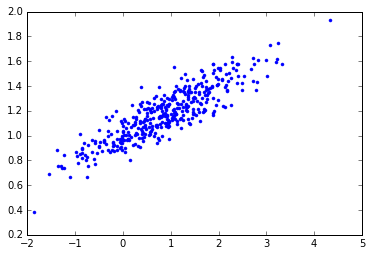

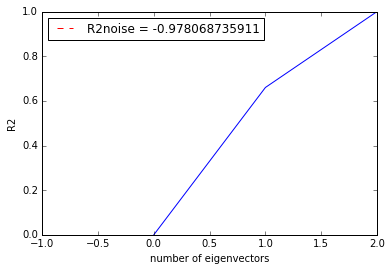

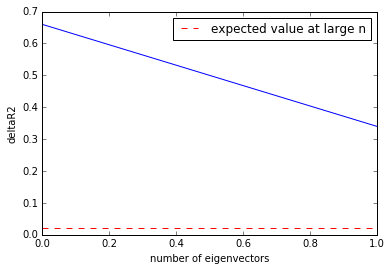

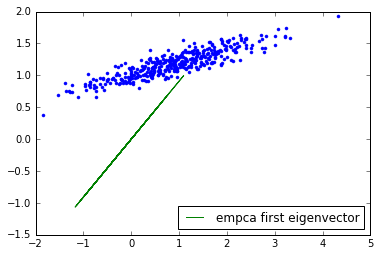

In [54]:
# Run a test sample with actual signal in the data

N = 400
D = 2
data = np.zeros((N,D))
data[:,0] = np.random.normal(loc=2*np.random.random(),size=N)
data[:,1] = 0.2*data[:,0] + 1
noise = 0.1*np.random.randn(N,D)
data += noise

Sd = np.sum(noise[:,0]**2)/N

plt.plot(data[:,0],data[:,1],'.')

nvec=2


e = empca(data,nvec=nvec,niter=10)
p = classic_pca(data,nvec=nvec)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

mx = np.zeros(e.data.shape)
for i in range(nvec):
    mx += e._model_vec(i)

d = mx - e.data

plt.figure()
plt.plot(data[:,0],data[:,1],'.')
plt.plot(e.coeff[:,1]*e.eigvec[0][0],e.coeff[:,1]*e.eigvec[0][1],label='empca first eigenvector')
#plt.plot(p.coeff[:,1]*p.eigvec[0][0],p.coeff[:,1]*p.eigvec[0][1],label='classic first eigenvector')
plt.legend(loc='best')
print e.coeff.shape

# N > D Case #

In [61]:
N = 400
D = 3
data,noise,Sd = makemydata(N,D)

       iter        R2             rchi2
EMPCA  1/10      -0.63142325  12718.24565518
EMPCA  2/10      -0.74213587  11096.64197494
EMPCA  3/10      -0.75827239  10890.28454907
EMPCA  4/10      -0.75713913  10423.25843154
EMPCA  5/10      -0.73393897  10057.68729020
EMPCA  6/10      -0.70185215   9480.59134843
EMPCA  7/10      -0.71402239   9781.44317167
EMPCA  8/10      -0.67632115  10071.97105167
EMPCA  9/10      -0.68714623  10109.01182753
EMPCA 10/10      -0.62745260   9745.32121956
R2: -0.627452604461
0.00996538124355 1.34043727243 0.992565574348


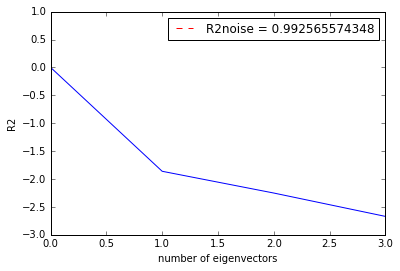

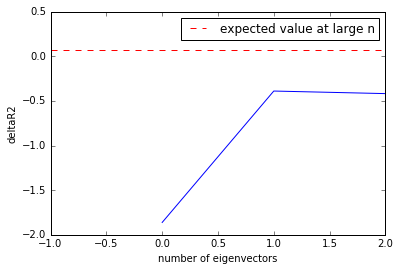

In [66]:
nvec = 3
e = empca(data,weights = 1./noise**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

# N < D Case #

In [64]:
N = 50
D = 400
data,noise,Sd = makemydata(N,D)

       iter        R2             rchi2
EMPCA  1/10       1.00000000     -0.00000002
EMPCA  2/10       1.00000000     -0.00000001
EMPCA  3/10       1.00000000     -0.00000002
EMPCA  4/10       1.00000000     -0.00000002
EMPCA  5/10       1.00000000     -0.00000002
EMPCA  6/10       1.00000000     -0.00000002
EMPCA  7/10       1.00000000     -0.00000002
EMPCA  8/10       1.00000000     -0.00000002
EMPCA  9/10       1.00000000     -0.00000002
EMPCA 10/10       1.00000000     -0.00000002
R2: 1.0
0.00996538124355 1.34043727243 0.992565574348


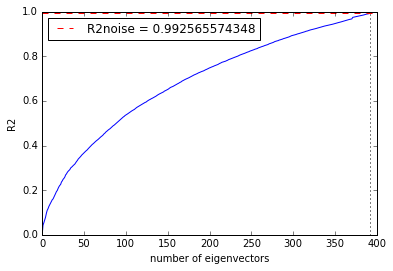

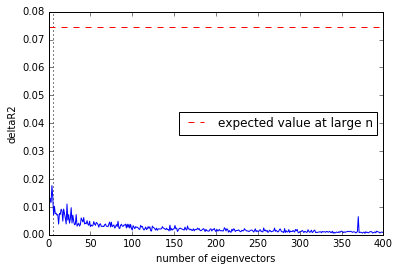

In [67]:
nvec = 400
e = empca(data,weights = 1./noise**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')